In [1]:
import random
import numpy as np
import statistics 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from scipy import ndimage
from scipy import stats
from scipy.spatial import distance
from scipy.stats.stats import pearsonr 
import scipy.signal 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from itertools import cycle
import seaborn as sns
import math
from sklearn.model_selection import train_test_split


# import caiman as cm
# from caiman.source_extraction import cnmf
# from caiman.utils.utils import download_demo
# from caiman.utils.visualization import inspect_correlation_pnr
# from caiman.motion_correction import MotionCorrect
# from caiman.source_extraction.cnmf import params as params
# import matlab
# import matlab.engine

#plotting params
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = '0.5'
mpl.rcParams['axes.labelsize'] = '8'
mpl.rcParams['axes.labelcolor'] = 'black'

mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['xtick.labelsize'] = '8'
mpl.rcParams['ytick.labelsize'] = '8'
mpl.rcParams['ytick.color'] = 'black'

In [132]:
inputEventTrace = '/Users/rufusmitchell-heggs/Desktop/data/preprocessing/ANL/preprocessed_files/ANLmega_events.csv'
inputTrace = '/Users/rufusmitchell-heggs/Desktop/data/preprocessing/ANL/preprocessed_files/ANLmega_trace.csv'

In [133]:
data_event = pd.read_csv(inputEventTrace, sep=',', dtype=str, error_bad_lines=False, encoding="utf-8-sig")
data_trace = pd.read_csv(inputTrace, sep=',', dtype=str, error_bad_lines=False, encoding="utf-8-sig")
data_trace['unique_stage']=data_trace['stage']+data_trace['session'].astype(str)

In [134]:
def get_session(data_event_or_data_trace):
    """"get session takes the mega_event or trace file in and returns a list of all the session blocks
    INPUT:
    -------
    >> data_event_or_data_trace - mega_events OR mega_trace file
    
    OUTPUT:
    -------
    >> blocks - a list of all events or traces as in dataframe format """

    batches_dic = {'Exp1':1, 'Pre1':2, 'Nov1':3, 'Exp2':4, 'Pre2':5, 'Nov2':6, 'Exp3':7, 'Nov3':8}
    batches = list(set(data_event_or_data_trace.unique_stage))
    sorted_batches = []
    for i in batches:
        sorted_batches.append(batches_dic[i])
    sorted_batches.sort()

    batches = []
    for i in sorted_batches:
        batches.append(list(batches_dic.keys())[list(batches_dic.values()).index(i)])
    
    blocks = []
    for batch in batches:
        blocks.append(data_event_or_data_trace[data_event_or_data_trace['unique_stage']==batch])

    return blocks

events = get_session(data_event)

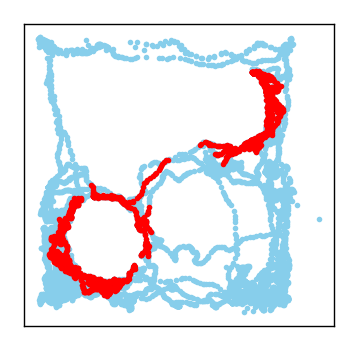

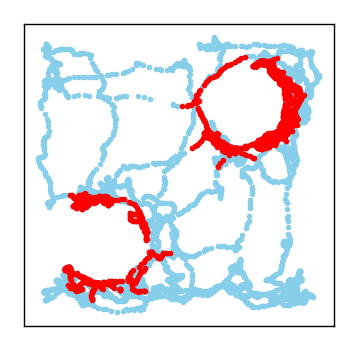

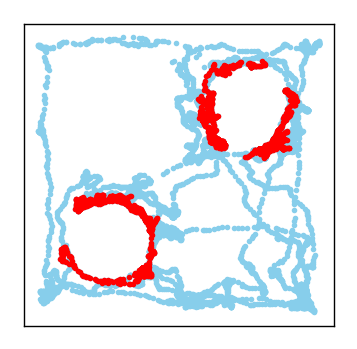

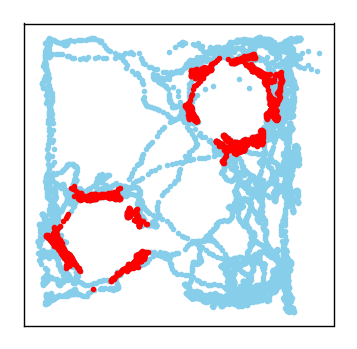

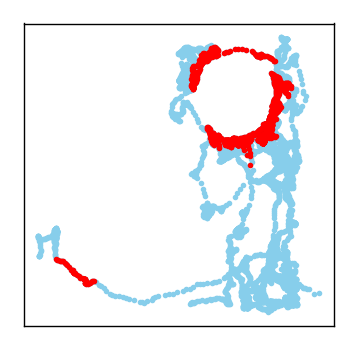

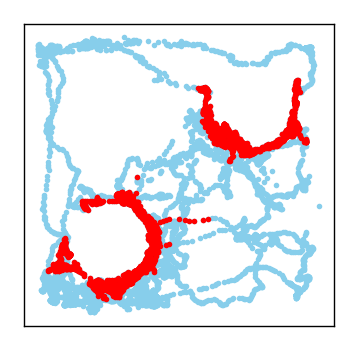

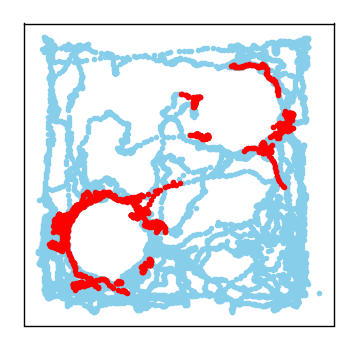

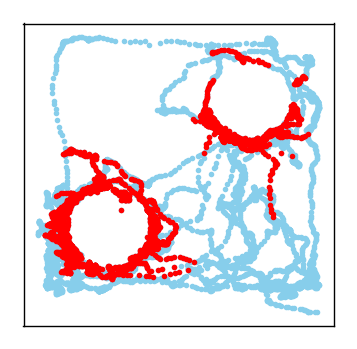

In [140]:
for i in range(len(events)):
    stage = i

    dlc = events[stage][['x', 'y', 'likelihood','raw_behaviour']]

    x = np.array(events[stage]['x'].astype(float))
    y = np.array(events[stage]['y'].astype(float))
    raw_behaviour = np.array(events[stage]['raw_behaviour'].astype(float))
    likelihood = np.array(events[stage]['likelihood'].astype(float))

    cage1 = []
    cage2 = []
    for i in range(len(likelihood)):
        if likelihood[i] < 0.9 or 500>x[i]or x[i]>1450:
            x[i] = np.nan
            y[i] = np.nan
            raw_behaviour[i] = np.nan
            
        if raw_behaviour[i] ==1 and x[i]:
            cage1.append([x[i],y[i]])
        elif raw_behaviour[i] ==2 and  x[i]:
            cage2.append([x[i],y[i]])
            

    plt.figure(figsize=(2, 2), dpi=200)
    plt.scatter(x,y,s=1, color='skyblue')
    plt.scatter(np.array(cage1).transpose()[0], np.array(cage1).transpose()[1], s=1, color = 'red')
    plt.scatter(np.array(cage2).transpose()[0], np.array(cage2).transpose()[1], s=1, color = 'red')
    plt.gca().invert_yaxis()
    plt.tick_params(bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

    plt.show()